# Assignment 2

The idea behind assignment 2 is to build an ML model that recognizes emotions from images (sad face, happy, surprised, etc.). In order to achieve this, we will train the FER 2013 dataset that can befound in Kaggle (https://www.kaggle.com/datasets/purnisharma/fer2013). This version of FER 2013 stores all the images and labels for the three splits in a single .csv file. The very first steo is to split this into the three sets so that we avoid data leakages between the training, private test and public test sets.

The training set will be used for training. You will try to improve the performance by measuring on the private test set and to make your final validation in the public test set.


In [5]:
import pandas as pd
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils.class_weight import compute_class_weight

# Load the dataset
df = pd.read_csv('C:\\Users\\20192913\\OneDrive - TU Eindhoven\\Mastervakken\\Data analysis and learning methods\\fer2013.csv') # Add here the path to your fer2013.csv file

###################################################################
# Separating the dataset between train, test, and validation sets
###################################################################
# The dataset already contains the splits which are specified in the 
# "Usage" field
print( df['Usage'].value_counts() )

# We use for training and validation the "Training" and "PublicTest"
trai_df = df[df['Usage']== 'Training'].copy()
vali_df = df[df['Usage'] == 'PublicTest'].copy()
test_df = df[df['Usage'] == 'PrivateTest'].copy() 

# Storing train and test data frames
trai_df.to_csv("./data/fer2013_train.csv", encoding='utf-8', index=False)
vali_df.to_csv("./data/fer2013_validation.csv", encoding='utf-8', index=False)
test_df.to_csv("./data/fer2013_test.csv", encoding='utf-8', index=False)

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


Now we compute the class weights for the training set

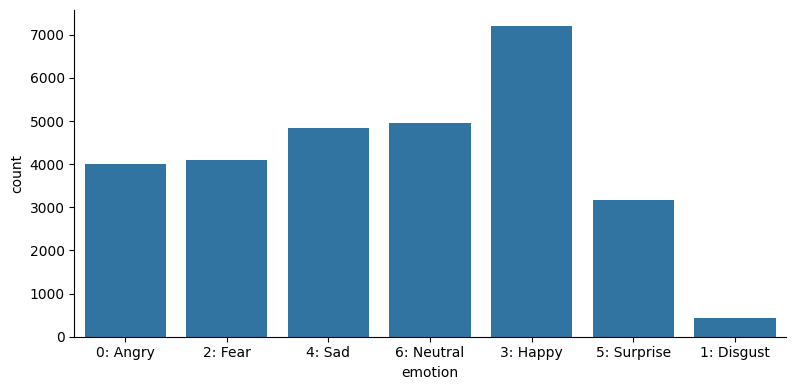

In [6]:
emotionDict = {
    0:'0: Angry',
    1:'1: Disgust',
    2:'2: Fear',
    3:'3: Happy',
    4:'4: Sad',
    5:'5: Surprise',
    6:'6: Neutral'
}


sns.catplot(data=trai_df.replace({'emotion': emotionDict}), kind='count', x='emotion', height=4, aspect=2)

#sns.countplot(x ='emotion', data = trai_df)
plt.show()

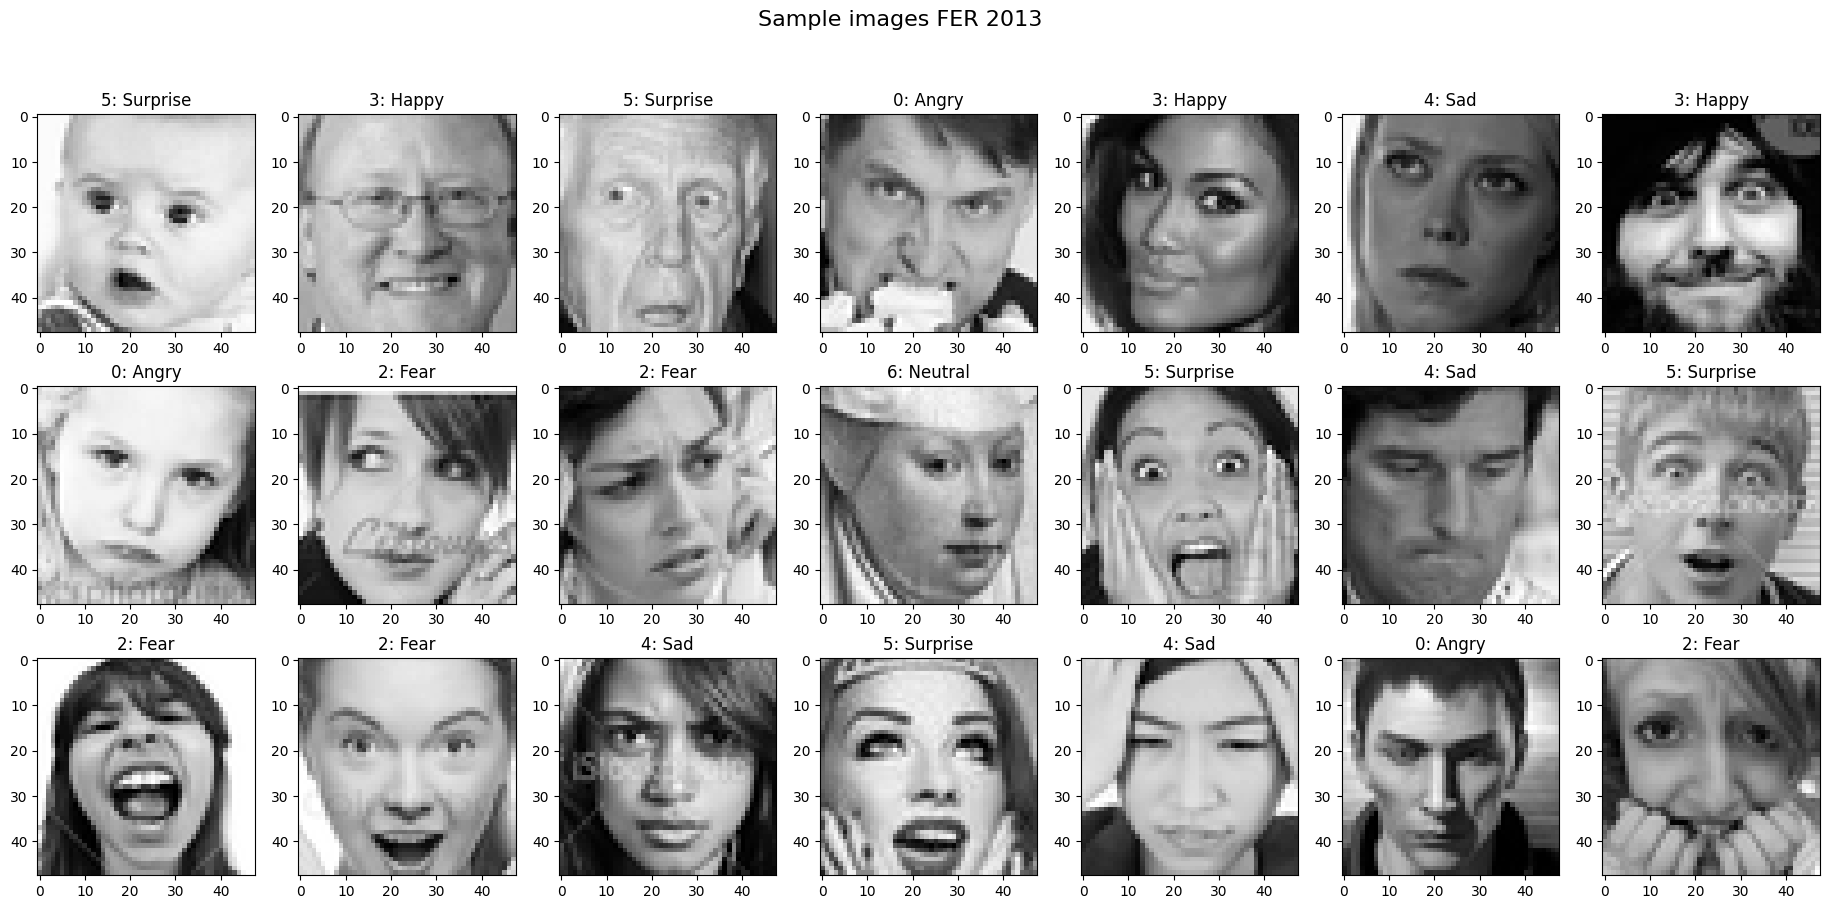

In [7]:
import matplotlib.pyplot as plt

# Now making some plots
random_rows = df.sample(n=21, random_state=43)
imgs = [np.fromstring(pixels, sep=' ').reshape(48, 48) for pixels in random_rows['pixels']]
lbl =  random_rows['emotion'].values

fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(23, 10))
fig.suptitle('Sample images FER 2013', fontsize=16)

# Loop through each subplot and customize
for i in range(7):
    for j in range(3):
        ax = axes[j, i]
        ax.imshow(imgs[j*7+i], cmap="gray") 
        ax.set_title('%s'%(emotionDict[lbl[j*7+i]]))
        #ax.grid(True)
plt.show()
